In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('data.csv')

### 전류 분포

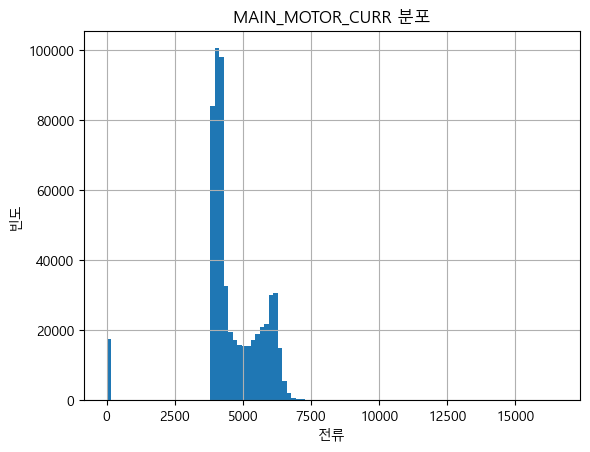

In [4]:
plt.hist(df['MAIN_MOTOR_CURR'], bins=100)
plt.title("MAIN_MOTOR_CURR 분포")
plt.xlabel("전류")
plt.ylabel("빈도")
plt.grid(True)
plt.show()


In [5]:
df['MAIN_MOTOR_CURR'].value_counts()

MAIN_MOTOR_CURR
0.00       17488
3870.00     3116
3876.00     3104
3873.00     3095
3869.00     3087
           ...  
4839.33        1
5138.00        1
4455.50        1
4566.25        1
5031.71        1
Name: count, Length: 5400, dtype: int64

In [6]:
df['MAIN_MOTOR_ALM'].value_counts()

MAIN_MOTOR_ALM
0.0       520995
2570.0     58302
Name: count, dtype: int64